# UNSUPERVISED LEARNING - K Means Clustering, Agglomerative Clustering & DBSCAN

### EXAMPLE

#### Imagine we have 19 data points that look like this:

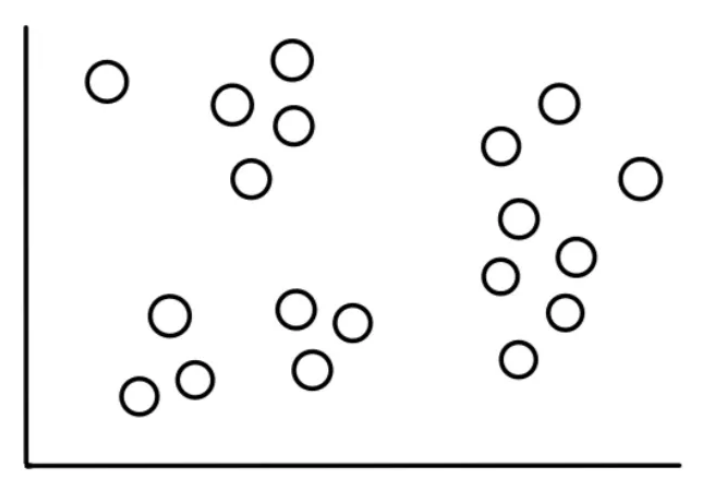





#### Now assume that we know this data fits into 3, relatively obvious, categories that look like this:

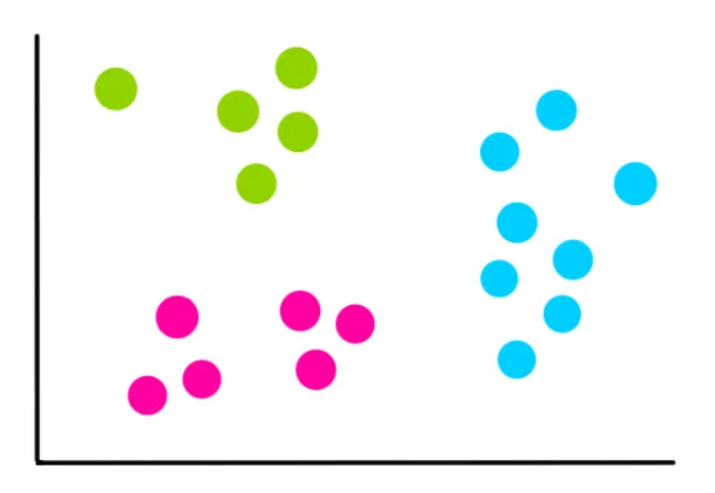

Our task is to use the k-means Clustering algorithm to do this categorization.


### Step 1: Select the Number of Clusters, k
The number of clusters we want to identify is the k in k-means clustering. In this case, since we assumed that there are 3 clusters, k = 3.

### Step 2: Select k Points at Random
We start the process of finding clusters by selecting 3 random points (not necessarily our data points). These points will now act as centroids, or the center, of clusters that we are going to make:

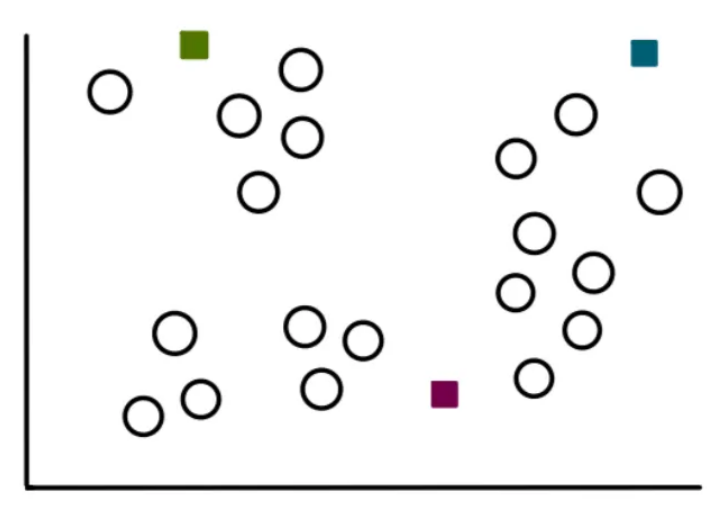



### Step 3: Make k Clusters
To make the clusters, we start by measuring the distance from each data point to each of the 3 centroids. And we assign the points to the cluster closest to it. So for a sample point, the distances will look like this:

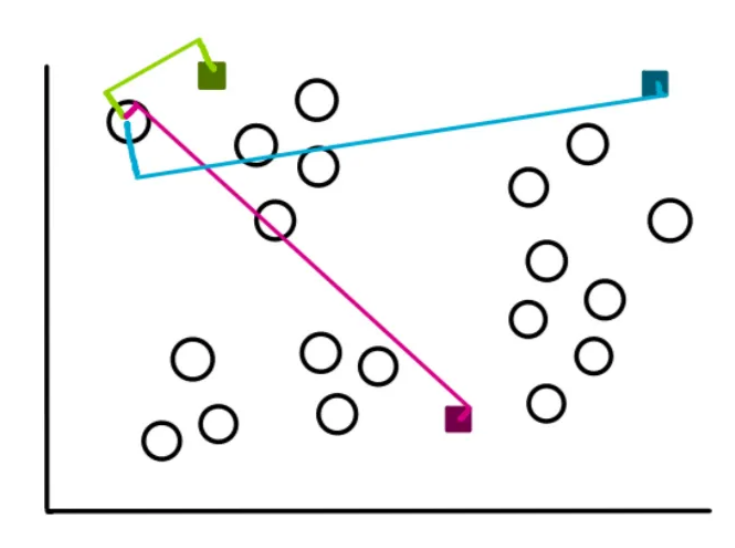

By just looking at it, we see that the distance from the point to the green centroid is the least, so we assign the point to the green cluster.

In two dimensions, the formula to find the distance between two points is:

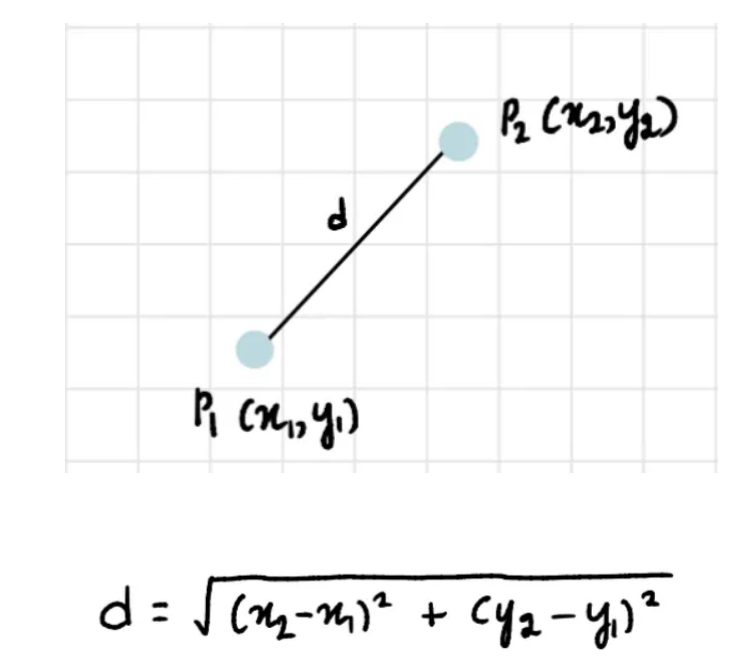

Using the above formula, we repeat this process for the rest of the points and the clusters will look something like this:

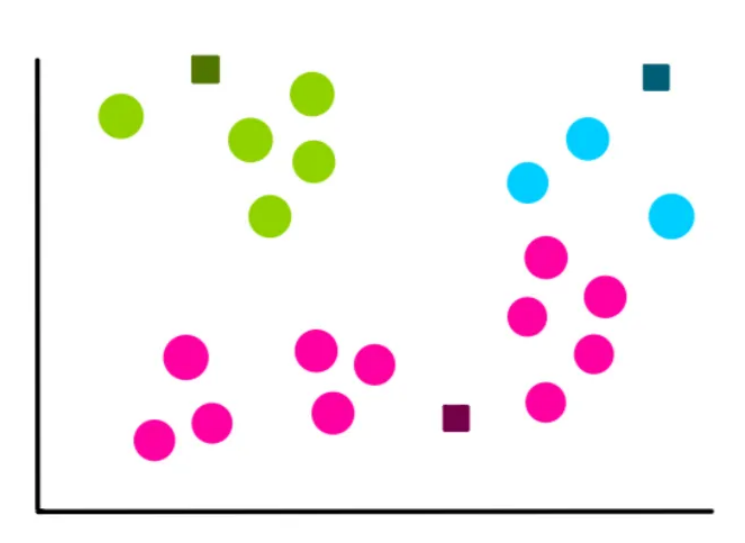

### Step 4: Compute New Centroid of Each Cluster
Now that we have our 3 clusters, we find the new centroids formed by each of them. For instance, the way we calculate the coordinates of the centroid of the blue cluster is:

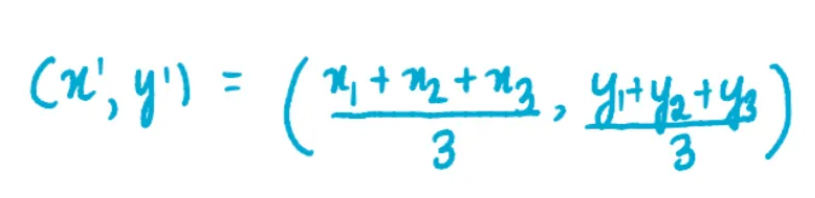

where x1, x2, and x3 are the x-coordinates of each of the 3 points of the blue cluster. And y1, y2, and y3 are the y-coordinates of each of the 3 points of the blue cluster. We divide the sum of the coordinates by 3 because there are 3 data points in the blue cluster. Similarly, the coordinates of the centroids of the pink and green clusters are:


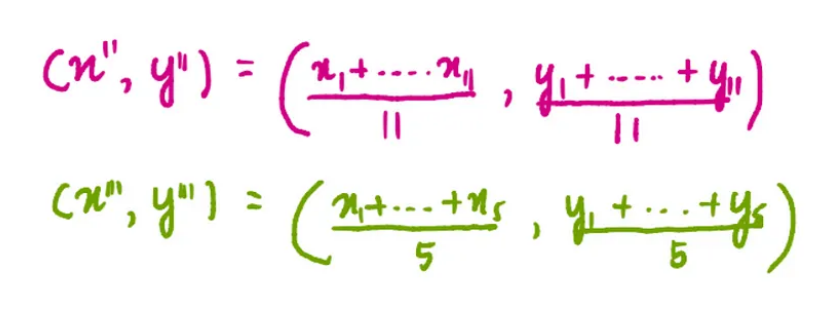

So, the new centroids look like this:

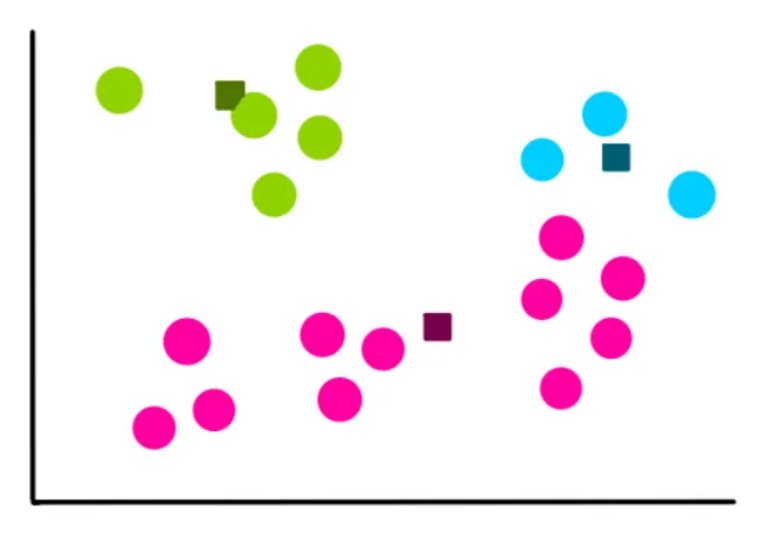



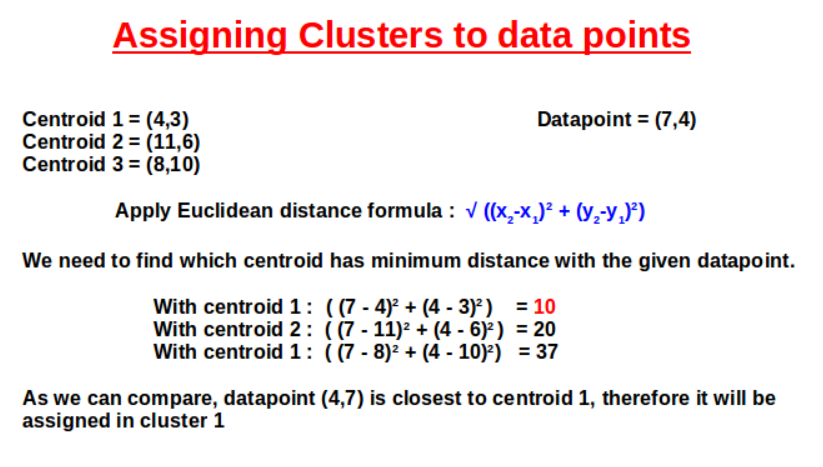

### Step 5: Assess the Quality of Each Cluster
Since k-means can’t see the clustering as we can, it measures the quality by finding the variation within all the clusters. The basic idea behind k-means clustering is defining clusters so that the within-cluster variation is minimized. We calculate something called Within-Cluster Sum of Squares (WCSS) to quantify this variance:

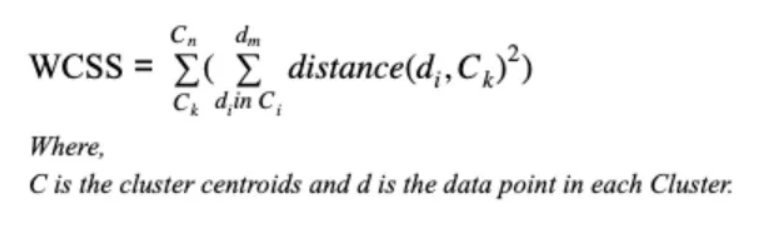

This is a scary-looking formula, so if you don't really understand it that’s okay; just try to understand the intuition behind it.

For simplification purposes, let’s represent the variation visually like this:

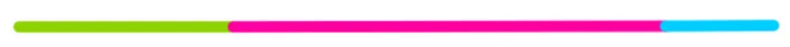

### Step 6: Repeat Steps 3–5
Once we have previous clusters and the variation stored, we start all over. But only this time we use the centroids we calculated previously to - make 3 new clusters, recalculate the center of the new clusters, and calculate the sum of the variation within all the clusters.

Let’s suppose the next 4 iterations look like this:

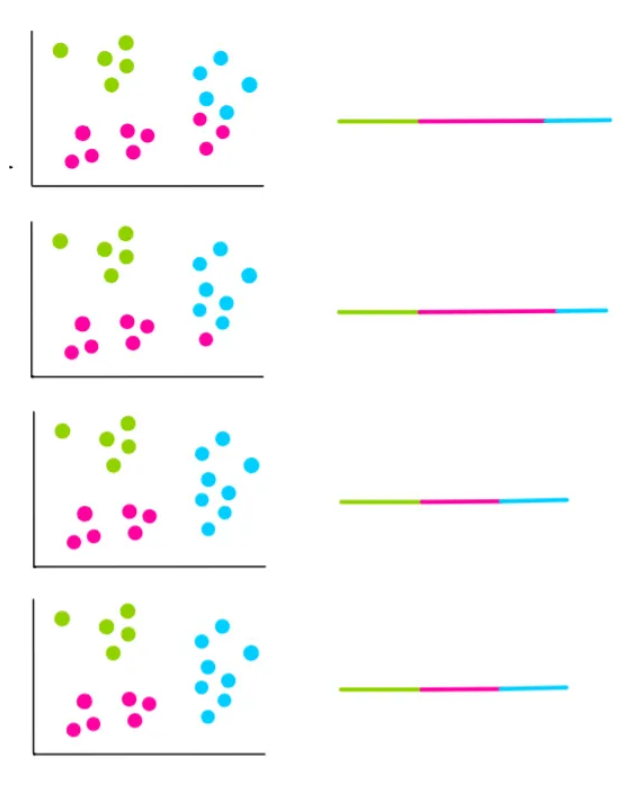

From the last two iterations, we see that the clusters haven’t changed. This means that the algorithm has converged and we stop the clustering process. We then choose the clusters with the least WCSS. This also happens to be those of the last two iterations. So, they are going to be our final clusters.

### How do we choose k?
In our example, we conveniently knew that we need 3 clusters. But what if we don't know how many clusters we have, then how do we choose k?

In this case, we try multiple k values and calculate the WCSS.

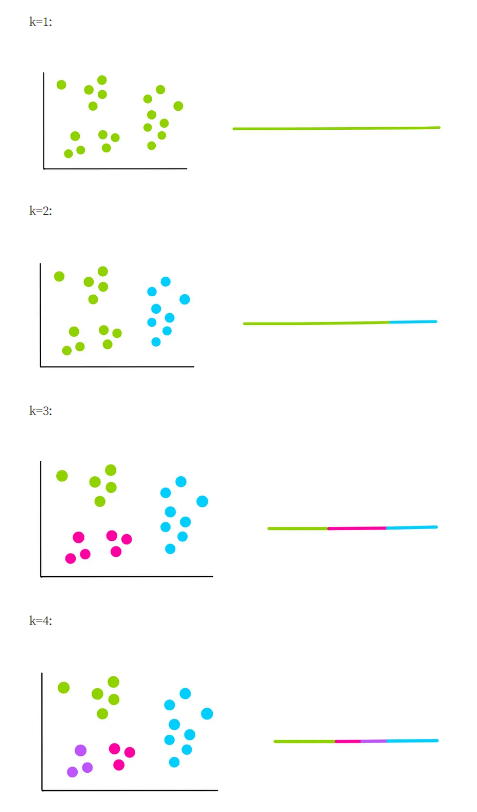

We notice that each time we add a new cluster, the total variation within each cluster is smaller than before. And when there is only one point per cluster, the variation = 0.

#### NB: Measures of variation are statistics of how far away the values in the observations (data points) are from each other.

So, we need to use something called an elbow plot to find the best k. It plots the WCSS against the number of clusters or k.

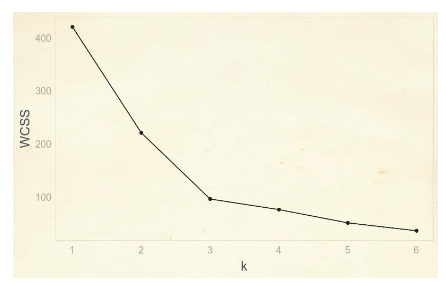

This is called an elbow plot because we can find an optimal k value by finding the “elbow” of the plot, which is at 3. Until 3 you can notice a huge reduction in variation, but after that, the variation doesn't go down as quickly.

And that’s about it. A simple, but effective clustering algorithm!

# How can you code a K-means clustering model in python

1.   #### Dropping unnecessary rows/columns before clustering

We’ll work with a dataset from Kaggle.

https://www.kaggle.com/datasets/vetrirah/customer

The dataset contains customer data, like gender, age, profession, size of family, etc. Our plan is to create clusters out of these customers.

Read in the dataset, save it to df, and view five random rows of it with the sample method:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Data-Science-Datasets/main/Customer_data.csv", on_bad_lines='skip')
df = pd.read_csv("segmentation data.csv")

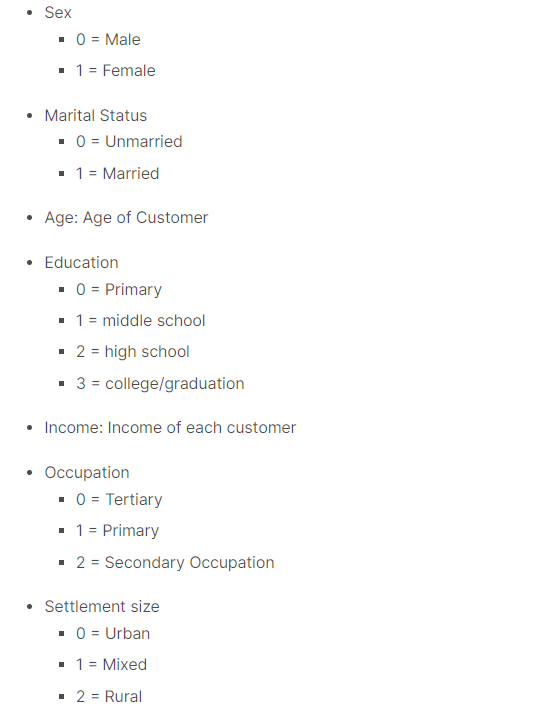

In [3]:
df.head()

ID  Sex  Marital status   Age  Education    Income  Occupation  \
0  100000001.0  0.0             0.0  67.0        2.0  124670.0         1.0   
1  100000002.0  1.0             1.0  22.0        1.0  150773.0         1.0   
2  100000003.0  0.0             0.0  49.0        1.0   89210.0         0.0   
3  100000004.0  0.0             0.0  45.0        1.0  171565.0         1.0   
4  100000005.0  0.0             0.0  53.0        1.0  149031.0         1.0   

   Settlement size  Unnamed: 8 Unnamed: 9 Unnamed: 10  Unnamed: 11  \
0              2.0         NaN        NaN         NaN          NaN   
1              2.0         NaN        NaN         NaN          NaN   
2              0.0         NaN        NaN         MIN       18.000   
3              1.0         NaN        NaN         MAX       76.000   
4              1.0         NaN        NaN        MEAN       35.909   

  Unnamed: 12  Unnamed: 13  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN

In [5]:
df.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  Unnamed: 8  Unnamed: 11  \
count    2000.000000  2000.000000      2000.000000         0.0     4.000000   
mean   120954.419000     0.810500         0.739000         NaN    35.407101   
std     38108.824679     0.638587         0.812533         NaN    28.937574   
min     35832.000000     0.000000         0.000000         NaN    11.719402   
25%     97663.250000     0.000000         0.000000         NaN    16.429851   
50%    115548.500000     1.000000         1.000000         NaN    26.954500   
75%    138072.250000     1.000000         1.000000         NaN    45.931750   
max    309364.000000     2.000000         2.000000         NaN    76.000000   

       Unnamed: 13  
count  2001.000000  
mean      0.308466  
std       0.202482  
min      -0.310345  
25%       0.155172  
50%       0.258621  
75%       0.413793  
max       1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   float64
 1   Sex              2000 non-null   float64
 2   Marital status   2000 non-null   float64
 3   Age              2000 non-null   float64
 4   Education        2000 non-null   float64
 5   Income           2000 non-null   float64
 6   Occupation       2000 non-null   float64
 7   Settlement size  2000 non-null   float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       1 non-null      object 
 10  Unnamed: 10      2005 non-null   object 
 11  Unnamed: 11      4 non-null      float64
 12  Unnamed: 12      1 non-null      object 
 13  Unnamed: 13      2001 non-null   float64
dtypes: float64(11), object(3)
memory usage: 220.0+ KB


It’s always recommended to get a general sense of the dataset you’re working with, so let’s do just that with df.info():

In [5]:
df.shape

(2010, 14)

In [6]:
df.drop(['ID','Unnamed: 8','Unnamed: 9','Unnamed: 10', 'Unnamed: 11','Unnamed: 12','Unnamed: 13'], inplace = True, axis = 1)

In [4]:
df.head()

Sex  Marital status   Age  Education    Income  Occupation  Settlement size
0  0.0             0.0  67.0        2.0  124670.0         1.0              2.0
1  1.0             1.0  22.0        1.0  150773.0         1.0              2.0
2  0.0             0.0  49.0        1.0   89210.0         0.0              0.0
3  0.0             0.0  45.0        1.0  171565.0         1.0              1.0
4  0.0             0.0  53.0        1.0  149031.0         1.0              1.0

In [7]:
df.tail(15)

Sex  Marital status   Age  Education    Income  Occupation  \
1995  1.0             0.0  47.0        1.0  123525.0         0.0   
1996  1.0             1.0  27.0        1.0  117744.0         1.0   
1997  0.0             0.0  31.0        0.0   86400.0         0.0   
1998  1.0             1.0  24.0        1.0   97968.0         0.0   
1999  0.0             0.0  25.0        0.0   68416.0         0.0   
2000  NaN             NaN   NaN        NaN       NaN         NaN   
2001  NaN             NaN   NaN        NaN       NaN         NaN   
2002  NaN             NaN   NaN        NaN       NaN         NaN   
2003  NaN             NaN   NaN        NaN       NaN         NaN   
2004  NaN             NaN   NaN        NaN       NaN         NaN   
2005  NaN             NaN   NaN        NaN       NaN         NaN   
2006  NaN             NaN   NaN        NaN       NaN         NaN   
2007  NaN             NaN   NaN        NaN       NaN         NaN   
2008  NaN             NaN   NaN        NaN       NaN         NaN   
2009  NaN             NaN   NaN        NaN       NaN         NaN   

      Settlement size  
1995              0.0  
1996              0.0  
1997              0.0  
1998              0.0  
1999              0.0  
2000              NaN  
2001              NaN  
2002              NaN  
2003              NaN  
2004              NaN  
2005              NaN  
2006              NaN  
2007              NaN  
2008              NaN  
2009              NaN

In [11]:
df.head()

Sex  Marital status   Age  Education    Income  Occupation  Settlement size
0  0.0             0.0  67.0        2.0  124670.0         1.0              2.0
1  1.0             1.0  22.0        1.0  150773.0         1.0              2.0
2  0.0             0.0  49.0        1.0   89210.0         0.0              0.0
3  0.0             0.0  45.0        1.0  171565.0         1.0              1.0
4  0.0             0.0  53.0        1.0  149031.0         1.0              1.0

In [269]:
df.isna().sum()

Sex                10
Marital status     10
Age                10
Education          10
Income             10
Occupation         10
Settlement size    10
dtype: int64

In [270]:
df = df.dropna()

In [271]:
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [272]:
df.shape

(2000, 7)

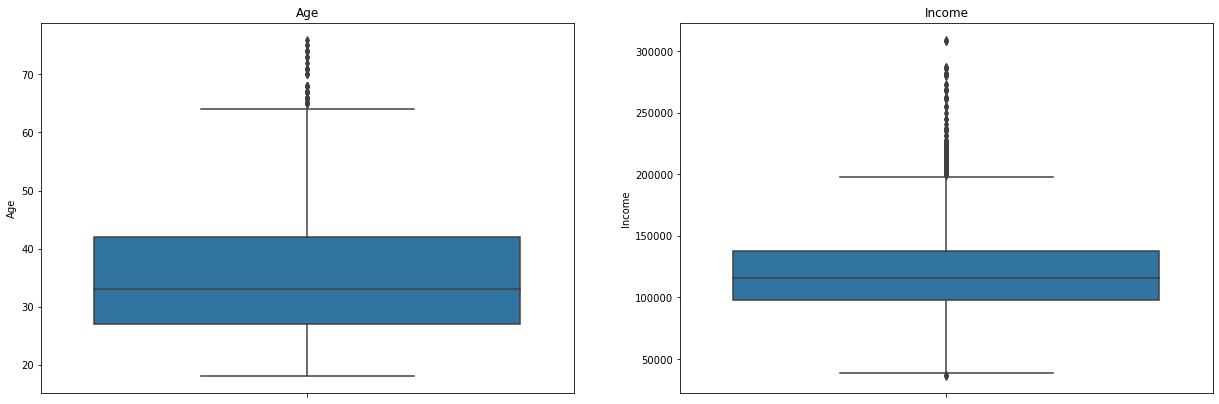

In [273]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Income)
plt.title("Income")

plt.show()

In [286]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

In [211]:
Q1

27.0

In [212]:
Q3

40.0

In [213]:
IQR

13.0

In [287]:
# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound: ", lower_bound)
print("upper_bound: ", upper_bound)

lower_bound:  7.5
upper_bound:  59.5


In [288]:
# Calculate the mean of the 'Age' column, excluding outliers
mean_age = df.loc[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound), 'Age'].mean()
type(mean_age)

float

In [289]:
mean_age

34.08141703394564

In [290]:
# Replace outliers with the mean value
df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound), 'Age'] = mean_age


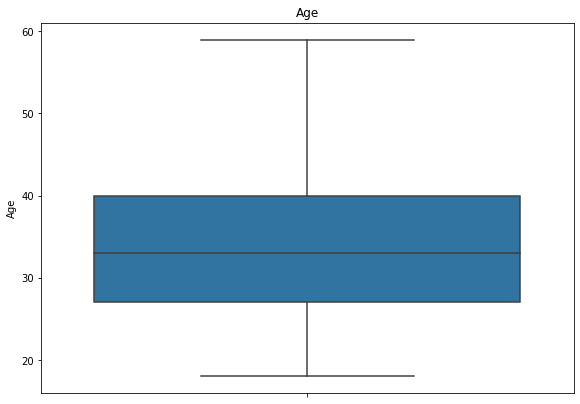

In [291]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.Age)
plt.title("Age")

plt.show()

In [312]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

In [313]:
# Determine the lower and upper bounds for outliers
lower_bound_income = Q1 - 1.5 * IQR
upper_bound_income = Q3 + 1.5 * IQR

print("lower_bound: ", lower_bound_income)
print("upper_bound: ", upper_bound_income)

lower_bound:  48839.125
upper_bound:  180014.125


In [314]:
# Calculate the mean of the 'Age' column, excluding outliers
mean_income = df.loc[(df['Income'] >= lower_bound_income) & (df['Income'] <= upper_bound_income), 'Income'].mean()

In [315]:
# Replace outliers with the mean value
df.loc[(df['Income'] < lower_bound_income) | (df['Income'] > upper_bound_income), 'Income'] = mean_income

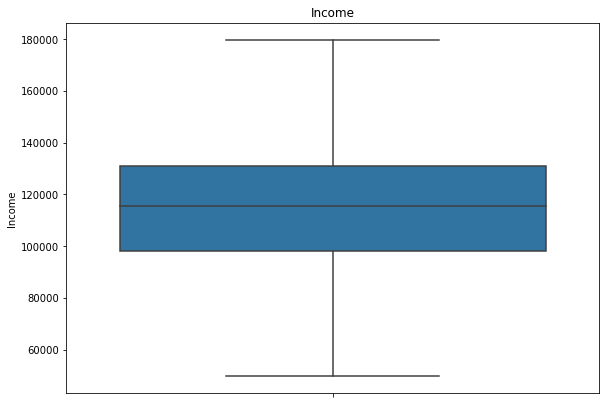

In [316]:
plt.figure(figsize=(21,15))



plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Income)
plt.title("Income")

plt.show()

In [26]:
df.Age.describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [27]:
df.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

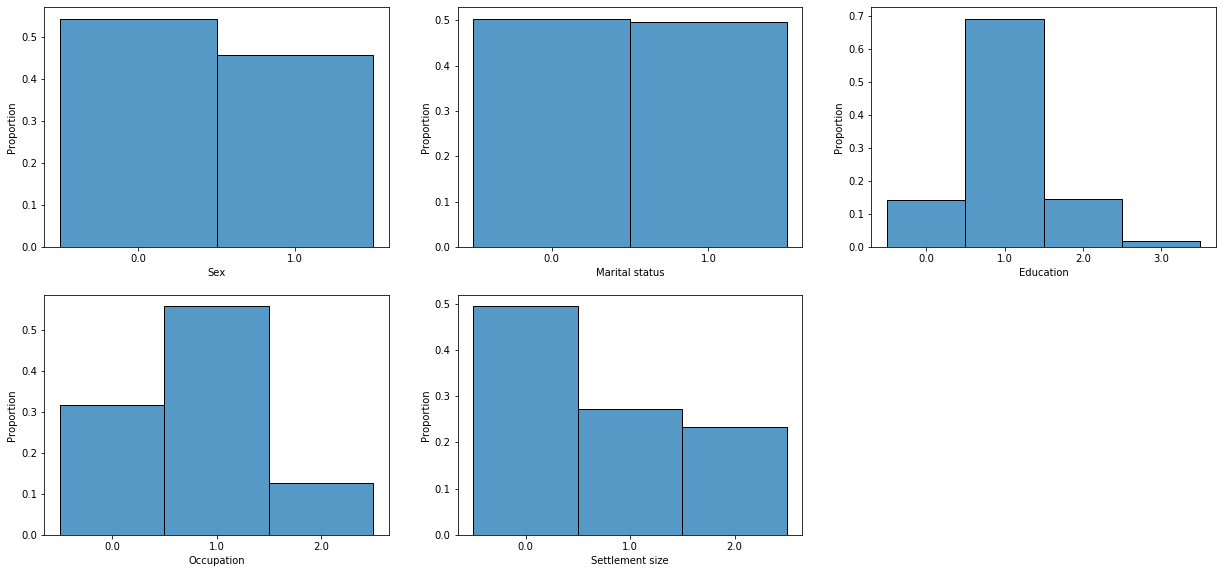

In [244]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(df.Sex.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(df['Marital status'].astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(df.Education.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(df.Occupation.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,1))
sns.histplot(df['Settlement size'].astype(str).sort_values(), stat='proportion')

plt.show()

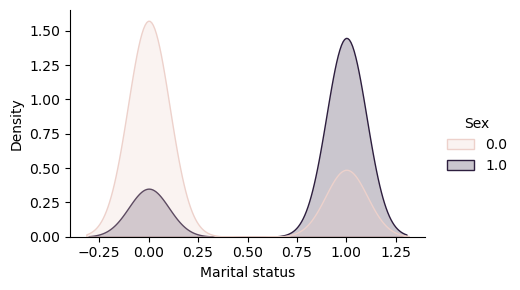

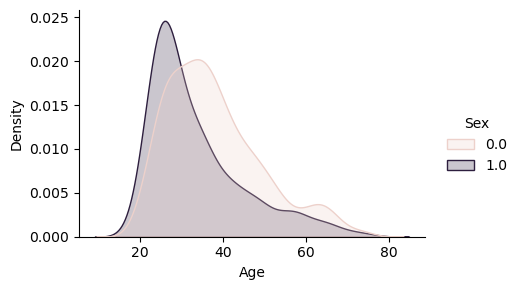

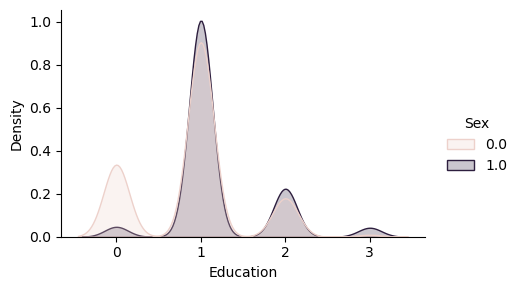

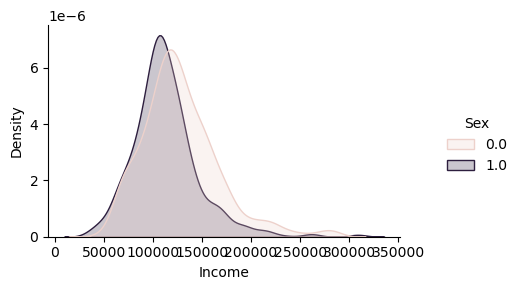

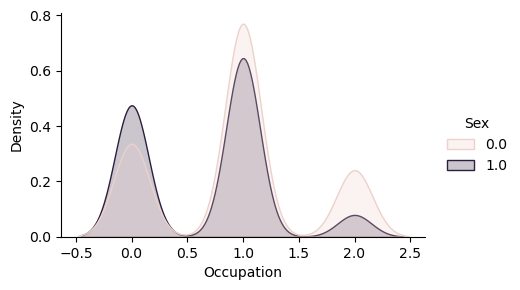

In [18]:
import warnings 

warnings.filterwarnings('ignore')


# Make the plots
sns.displot(df, x=df['Marital status'], hue="Sex", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['Age'], hue="Sex", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['Education'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['Income'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['Occupation'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)

# Display the plots
plt.show()

In [317]:
new_df = df[['Age', 'Income']]

In [318]:
new_df.head()

Age    Income
0  34.956253  124670.0
1  22.000000  150773.0
2  49.000000   89210.0
3  45.000000  171565.0
4  53.000000  149031.0

In [328]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0 -0.917399       -0.993024  0.096568   1.604323  0.361174    0.296823   
1  1.090038        1.007025 -1.333603  -0.063372  1.341554    0.296823   
2 -0.917399       -0.993024  1.646782  -0.063372 -0.970637   -1.269525   
3 -0.917399       -0.993024  1.205244  -0.063372  2.122462    0.296823   
4 -0.917399       -0.993024  2.088320  -0.063372  1.276128    0.296823   

   Settlement size  
0         1.552326  
1         1.552326  
2        -0.909730  
3         0.321298  
4         0.321298

In [246]:
df.head()

Sex  Marital status        Age  Education    Income  Occupation  \
0  0.0             0.0  34.081417        2.0  124670.0         1.0   
1  1.0             1.0  22.000000        1.0  150773.0         1.0   
2  0.0             0.0  49.000000        1.0   89210.0         0.0   
3  0.0             0.0  45.000000        1.0  171565.0         1.0   
4  0.0             0.0  53.000000        1.0  149031.0         1.0   

   Settlement size  
0              2.0  
1              2.0  
2              0.0  
3              1.0  
4              1.0

In [329]:
data=scaled[['Age','Income']]
data.head()

Age    Income
0  0.096568  0.361174
1 -1.333603  1.341554
2  1.646782 -0.970637
3  1.205244  2.122462
4  2.088320  1.276128

In [49]:
scaled.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0 -0.917399       -0.993024  2.653614   1.604323  0.097524    0.296823   
1  1.090038        1.007025 -1.187132  -0.063372  0.782654    0.296823   
2 -0.917399       -0.993024  1.117316  -0.063372 -0.833202   -1.269525   
3 -0.917399       -0.993024  0.775916  -0.063372  1.328386    0.296823   
4 -0.917399       -0.993024  1.458716  -0.063372  0.736932    0.296823   

   Settlement size  
0         1.552326  
1         1.552326  
2        -0.909730  
3         0.321298  
4         0.321298

In [331]:
km = KMeans(2)
km.fit(data)
print(km.inertia_)

2328.3356037765166


In [333]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss).astype(float)

wcss_df.head(10)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  "KMeans is known to have a memory leak on Windows "


wcss_score  no_of_clusters
0  4000.000000             1.0
1  2328.337727             2.0
2  1620.024727             3.0
3  1246.077438             4.0
4   986.386521             5.0
5   804.734774             6.0
6   664.769065             7.0
7   583.874297             8.0
8   524.259904             9.0
9   468.212576            10.0

**Inertia** measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

**A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.**

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


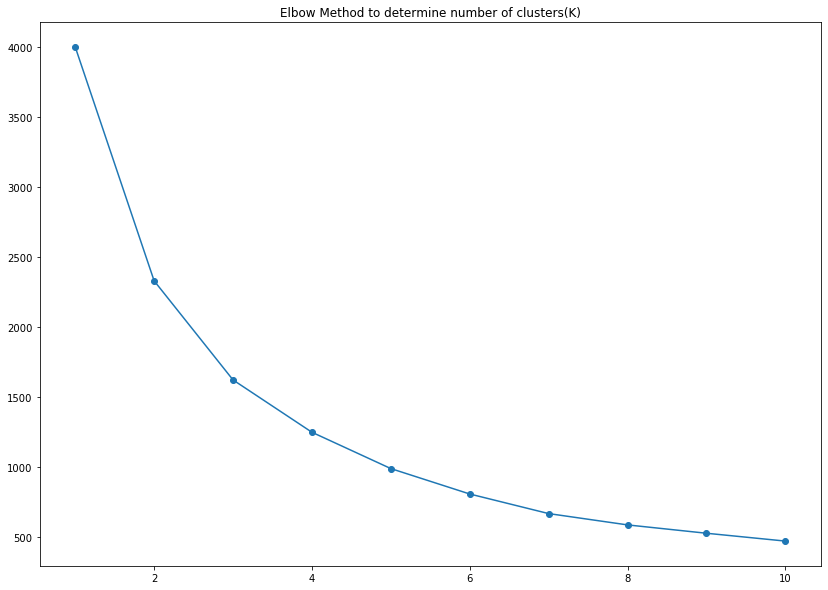

In [334]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means Clustering

In [335]:
#Algorithm

kmeans=KMeans(n_clusters=4,random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [336]:
prediction=kmeans.fit_predict(data)
prediction



array([3, 1, 2, ..., 0, 3, 0])

In [337]:
clustered_data = df.copy()
clustered_data["cluster_index"] = prediction

In [338]:
clustered_data


Sex  Marital status        Age  Education    Income  Occupation  \
0     0.0             0.0  34.956253        2.0  124670.0         1.0   
1     1.0             1.0  22.000000        1.0  150773.0         1.0   
2     0.0             0.0  49.000000        1.0   89210.0         0.0   
3     0.0             0.0  45.000000        1.0  171565.0         1.0   
4     0.0             0.0  53.000000        1.0  149031.0         1.0   
...   ...             ...        ...        ...       ...         ...   
1995  1.0             0.0  47.000000        1.0  123525.0         0.0   
1996  1.0             1.0  27.000000        1.0  117744.0         1.0   
1997  0.0             0.0  31.000000        0.0   86400.0         0.0   
1998  1.0             1.0  24.000000        1.0   97968.0         0.0   
1999  0.0             0.0  25.000000        0.0   68416.0         0.0   

      Settlement size  cluster_index  
0                 2.0              3  
1                 2.0              1  
2                 0.0              2  
3                 1.0              1  
4                 1.0              2  
...               ...            ...  
1995              0.0              2  
1996              0.0              3  
1997              0.0              0  
1998              0.0              3  
1999              0.0              0  

[2000 rows x 8 columns]

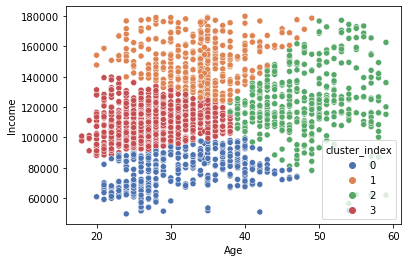

In [339]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Income,
                hue=clustered_data.cluster_index,
                palette="deep")

<Axes: xlabel='Age', ylabel='Income'>

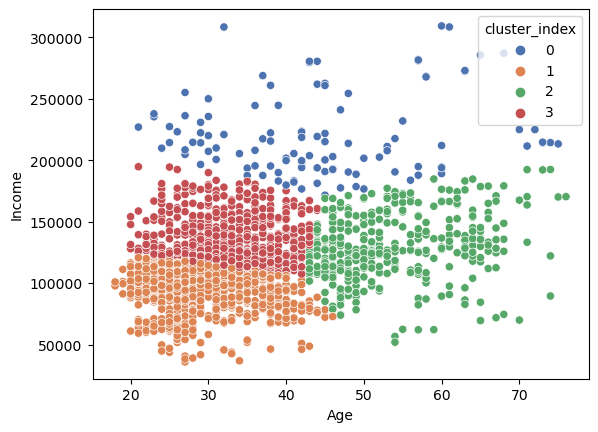

In [136]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [91]:
clustered_data.cluster_index.unique()

array([0, 1, 5, 2, 4, 3])

### Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

#### 1: Means clusters are well apart from each other and clearly distinguished.

#### 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

#### -1: Means clusters are assigned in the wrong way.


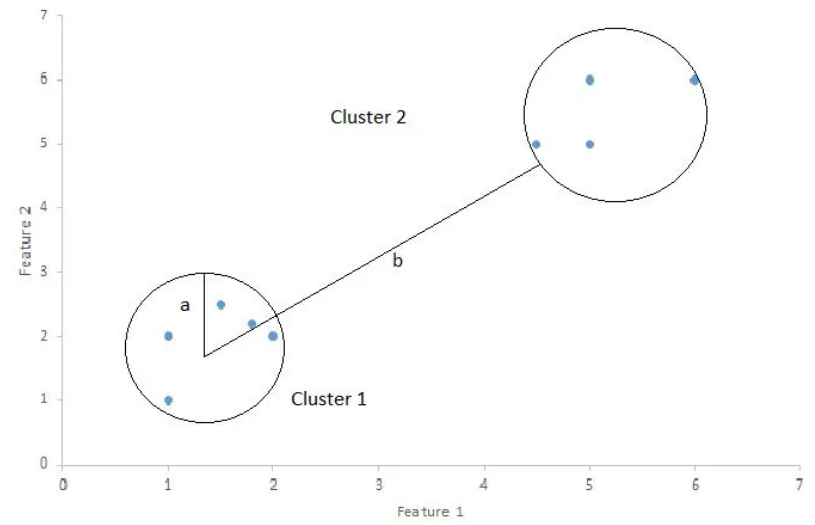

##### Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [137]:
score = silhouette_score(df, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.238 ~ 0


# Hierarchical clustering
Hierarchical clustering fits in within the broader clustering algorithmic world by creating hierarchies of different groups, ranging from all data points being in their own clusters, to all data points being in the same cluster. **This works by finding points that are within a certain threshold distance, and then grouping them together bit by bit.** Specifically, this algorithm comes in two forms: **top-down or bottom up**.

- The first, top-down, starts by treating all points as part of a single cluster and then gradually breaking them up into separate clusters (divissive) until they are all part of their own cluster. 

- The second, bottom-up, starts from the basis that all points are part of their own cluster and then groups the two closest points together, iteratively, until they are all part of a single cluster (Agglomerative). 

This hierarchy of clusters can be can be represented as a tree (or a dendrogram) as below, the leaves representing individual clusters and distance increasing as go up the clusters.

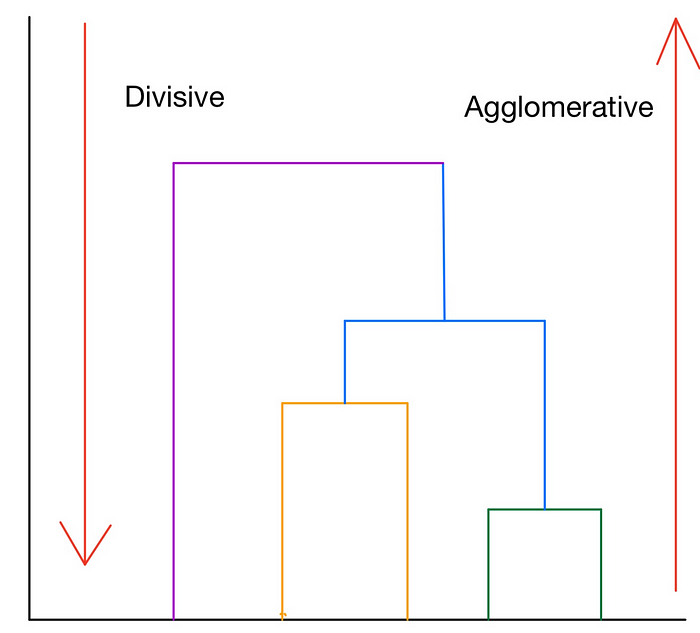

## Agglomerative Clustering
It is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

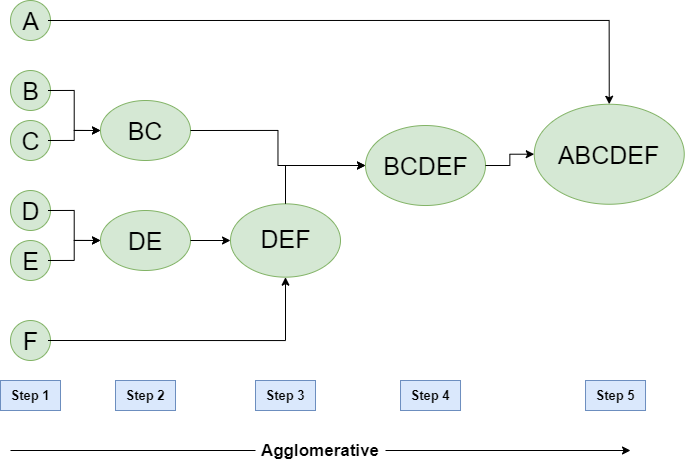


In [27]:
agc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

### Affinity
This is the distance metric.

#### Euclidean (l2)
This is the default distance metric used to measure the distance between clusters and is simply the straight line distance between two points. This is mathematically expressed as:
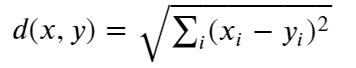

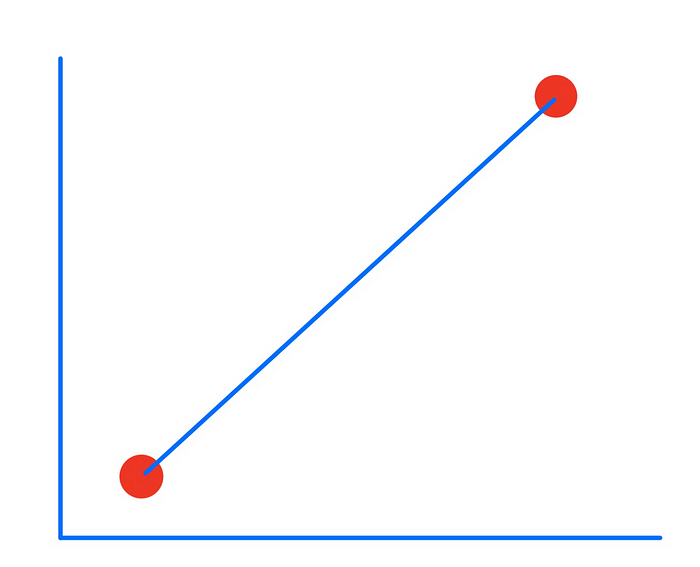

#### Manhattan (l1)
This distance is the sum of absolute difference between points across all the dimensions. This works as if there was grid like path between the points. This is mathematically expressed as:


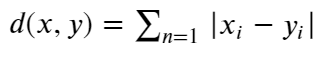

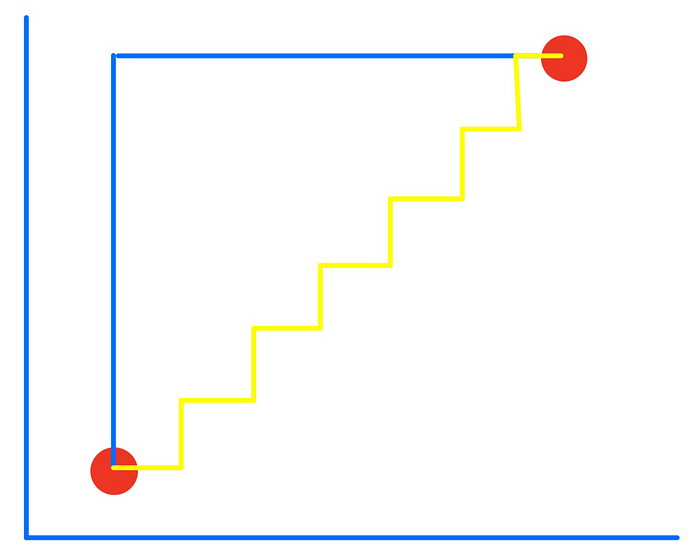

#### Cosine
This distance metric measures the degree of angle between two vectores. This is used when the magnitude between points does not matter but the orientation does and is often used in natural language programming. This is measured as:

cos(𝜃)=𝐴𝐵˙||𝐴||∗||𝐵||cos⁡(θ)=AB˙||A||∗||B||

#### Precomputed
This is used if you already have a precomputed distance matrix for your observations.

### Linkage

https://www.geeksforgeeks.org/ml-types-of-linkages-in-clustering/
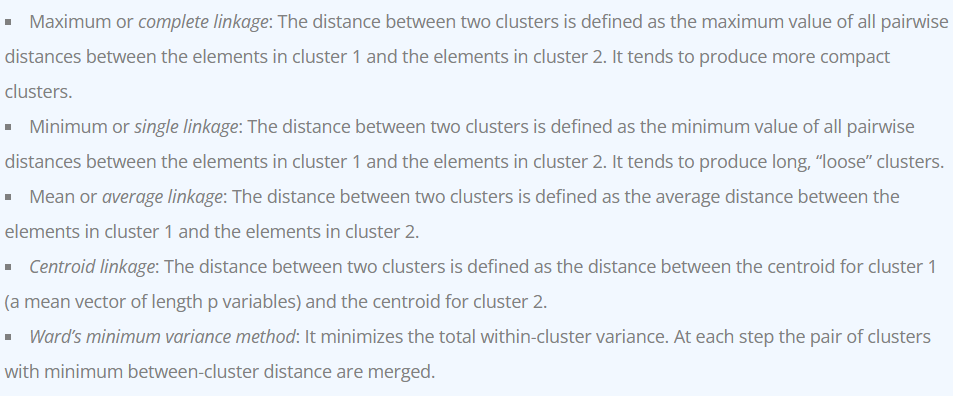

##### Single/Min
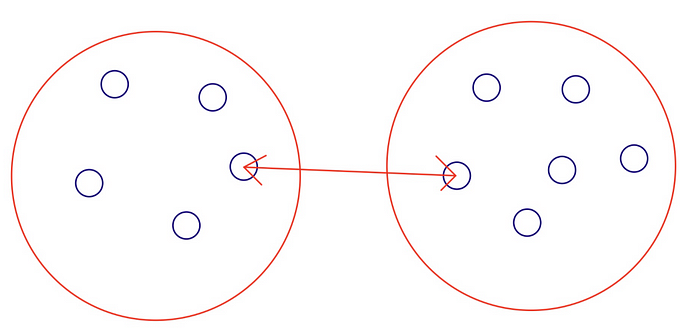

##### Complete/maximum
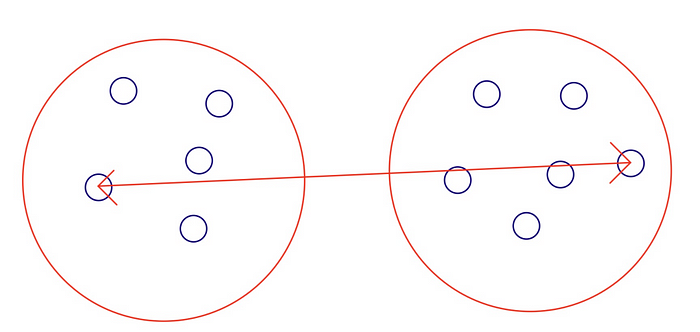

##### Average
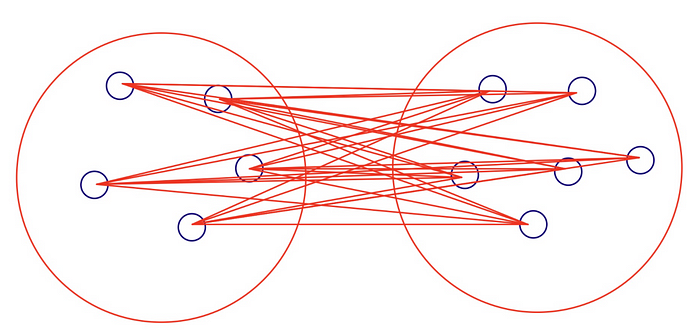

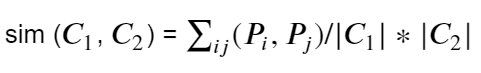

##### Wards
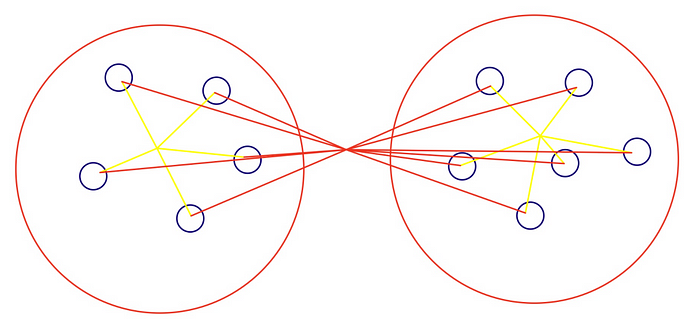

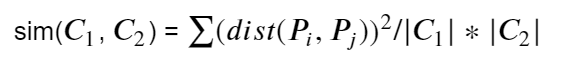

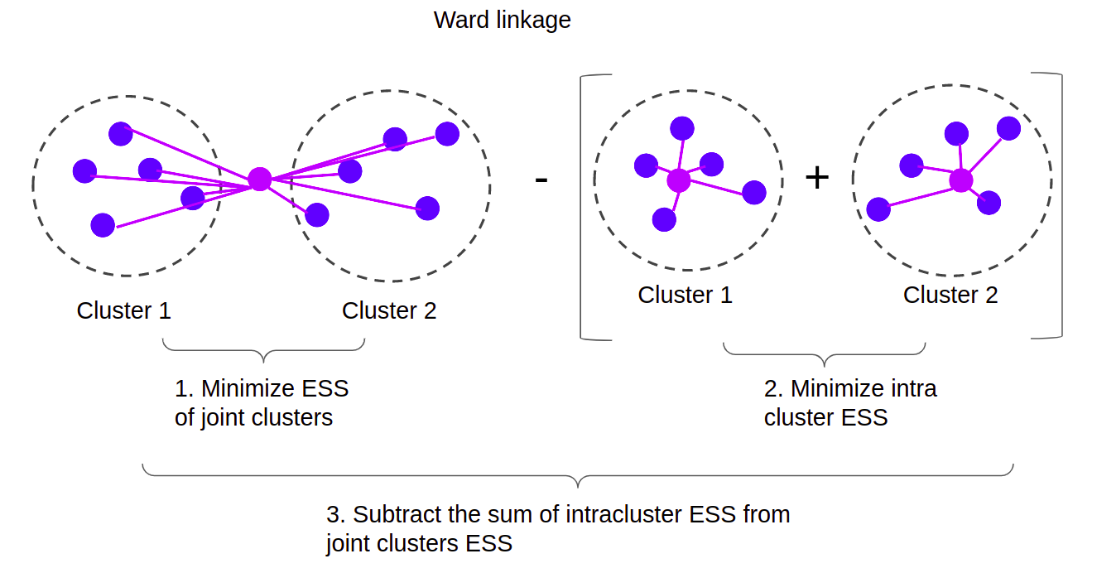

### What is Ward Linkage?
Ward linkage is a method to decide which clusters to merge at each step. It aims to minimize the total variance within the clusters. In simpler terms, it tries to keep the clusters as tight and compact as possible.

### Steps of Ward Linkage
1. **Start with individual items**: Each item is its own cluster.
2. **Calculate the "distance"** between each pair of clusters. Here, distance is measured by how much the sum of squared distances within all clusters would increase if we merged them.
3. **Merge the pair of clusters** with the smallest increase in total variance (i.e., the smallest distance).
4. **Repeat steps 2 and 3** until all items are in one cluster.

### Example
Imagine we have four points A, B, C, and D with the following coordinates:
- A: (1, 1)
- B: (2, 2)
- C: (5, 5)
- D: (6, 6)

#### Step-by-Step Process

1. **Start with each point as its own cluster**:
   - Clusters: {A}, {B}, {C}, {D}

2. **Calculate distances and merge the closest pair**:
   - Distance AB = √((2-1)² + (2-1)²) = √2 ≈ 1.41
   - Distance AC, AD, BC, BD, CD are larger.
   - Merge {A} and {B}.
   - Clusters: {AB}, {C}, {D}

3. **Calculate new distances and merge the closest pair**:
   - Distance (AB)C = Increase in total variance if we merge {AB} and {C}.
   - Distance (AB)D = Increase in total variance if we merge {AB} and {D}.
   - Distance CD = √((6-5)² + (6-5)²) = √2 ≈ 1.41
   - Merge {C} and {D}.
   - Clusters: {AB}, {CD}

4. **Calculate the distance between remaining clusters and merge**:
   - Distance (AB)(CD) = Increase in total variance if we merge {AB} and {CD}.
   - Merge {AB} and {CD}.
   - Clusters: {ABCD}

At each step, Ward's method chose the merge that resulted in the smallest increase in total variance. This process continues until all points are in one cluster.


In [28]:
agg_predict_scaled = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.25080894270462684


In [29]:
agg_predict_data = agc.fit_predict(data)
score = silhouette_score(data, agc.labels_, random_state=0)
print(score)

0.28777749083573534


In [30]:
agg_cluster_scaled = df.copy()
agg_cluster_scaled["cluster_index"] = agg_predict_scaled
agg_cluster_scaled.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
0    0               0   67          2  124670           1                2   
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   
3    0               0   45          1  171565           1                1   
4    0               0   53          1  149031           1                1   

   cluster_index  
0              2  
1              3  
2              0  
3              1  
4              1

In [32]:
agg_cluster_scaled.cluster_index.unique()

array([2, 3, 0, 1], dtype=int64)

In [33]:
agg_cluster_data = df.copy()
agg_cluster_data["cluster_index"] = agg_predict_data
agg_cluster_data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
0    0               0   67          2  124670           1                2   
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   
3    0               0   45          1  171565           1                1   
4    0               0   53          1  149031           1                1   

   cluster_index  
0              0  
1              3  
2              0  
3              0  
4              0

<Axes: xlabel='Age', ylabel='Income'>

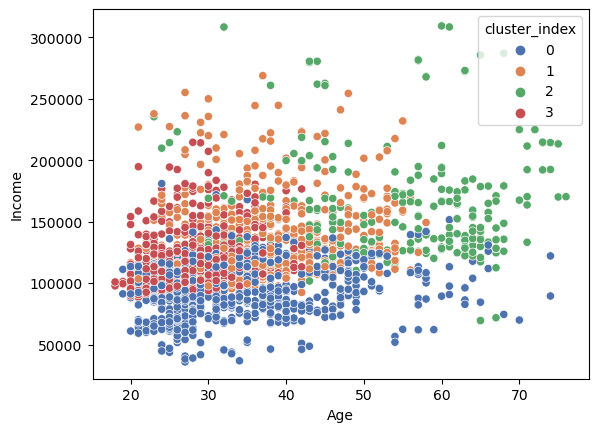

In [34]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_scaled.Age,
                y=agg_cluster_scaled.Income,
                hue=agg_cluster_scaled.cluster_index,
                palette="deep")

<Axes: xlabel='Age', ylabel='Income'>

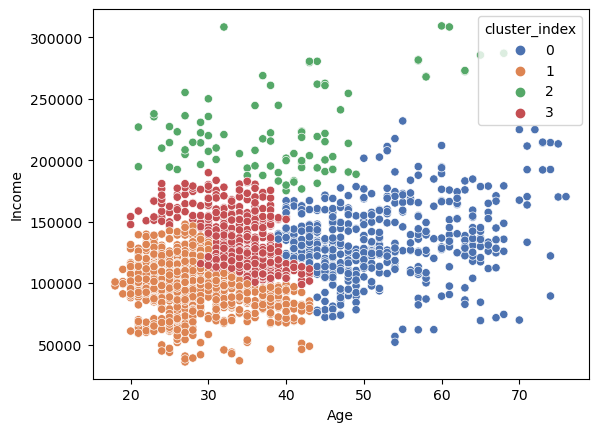

In [35]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_data.Age,
                y=agg_cluster_data.Income,
                hue=agg_cluster_data.cluster_index,
                palette="deep")

In [36]:
agg_cluster_data.groupby('cluster_index').size()

cluster_index
0    494
1    926
2     93
3    487
dtype: int64

In [42]:
!pip install plotly


     ---------------------------------------- 15.5/15.5 MB 5.2 MB/s eta 0:00:00
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)


### Dendogram
A dendrogram is a tree-like structure that explains the relationship between all the data points in the system.

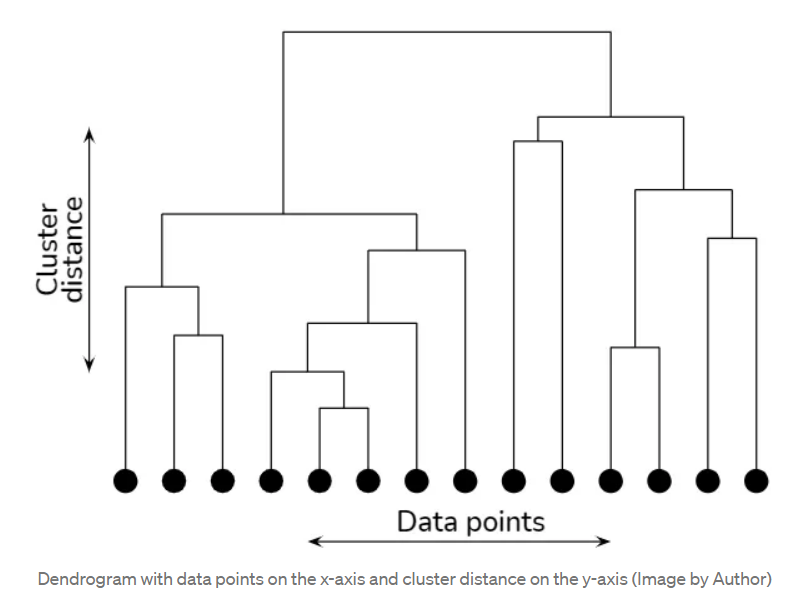

Dendrograms however do not do proper justice to understand how the clusters will look like after you place the horizontal cut. You have to individually mark the data points in a feature vector space with the resulting cluster indexes to visually see the effect of clustering.

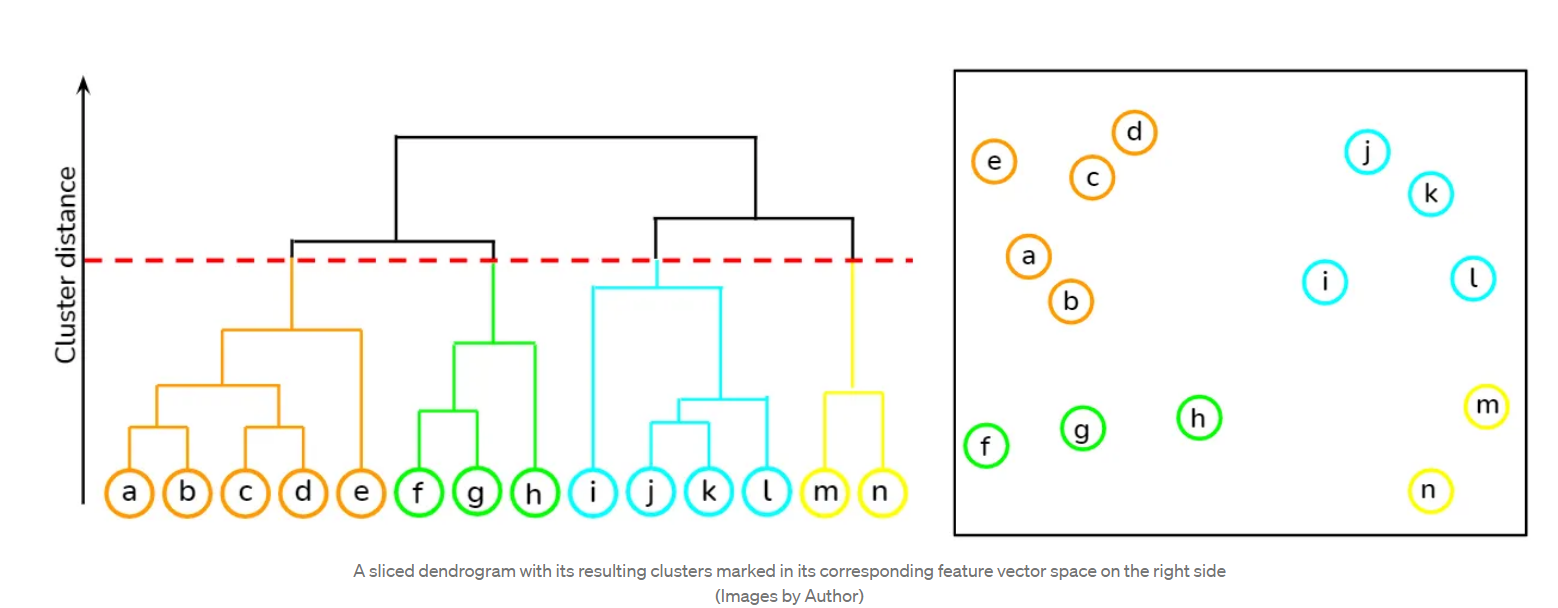

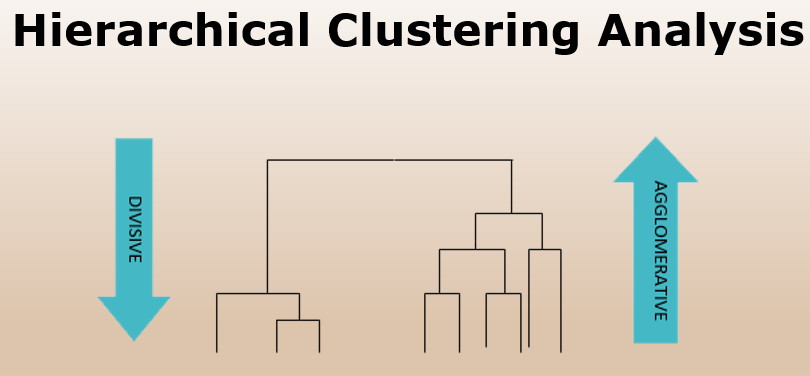

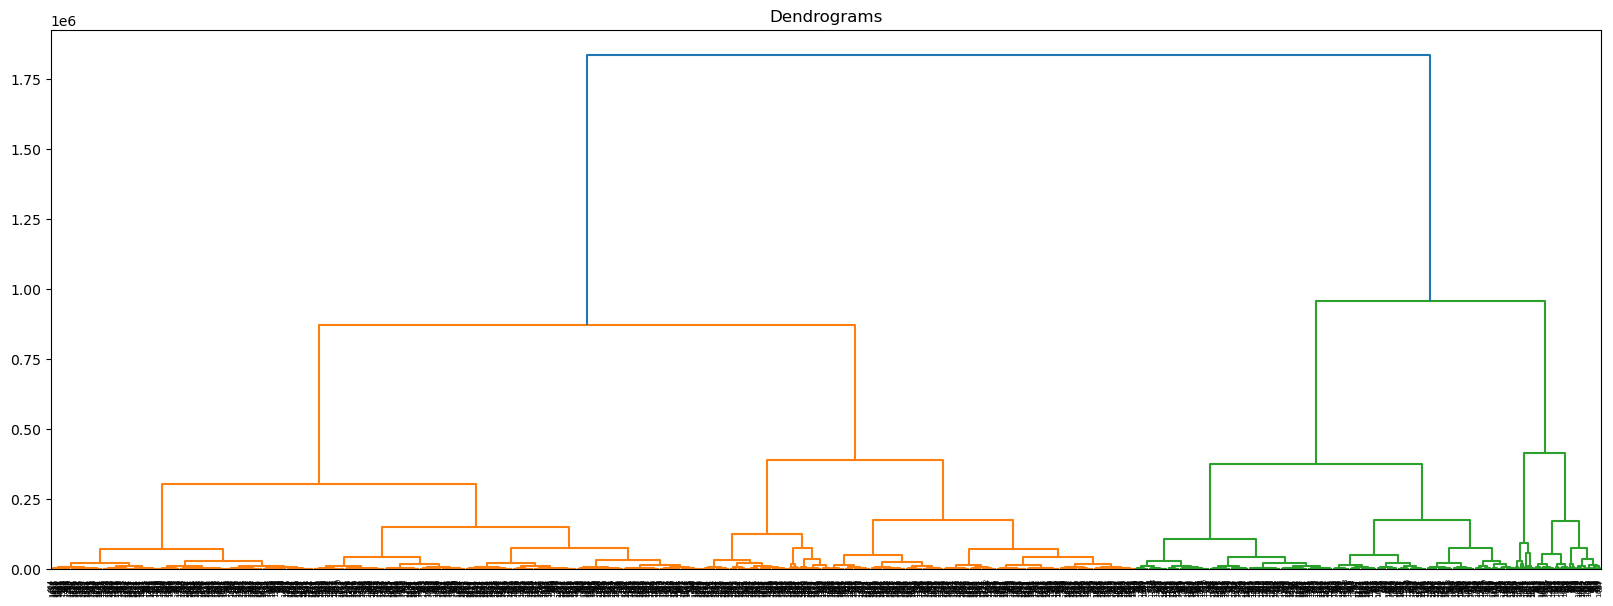

In [37]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(20, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(clustered_data, method='ward', metric='euclidean'))

## DBSCAN (Density-Based Spatial Clustering Of Applications With Noise)

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

#### K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.

Let’s try to understand it with an example. Here we have data points densely present in the form of concentric circles:

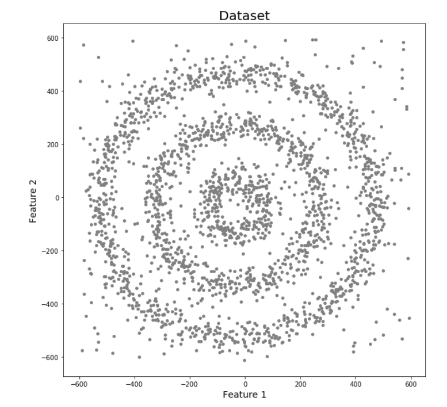

We can see three different dense clusters in the form of concentric circles with some noise here. Now, let’s run K-Means and Hierarchical clustering algorithms and see how they cluster these data points.

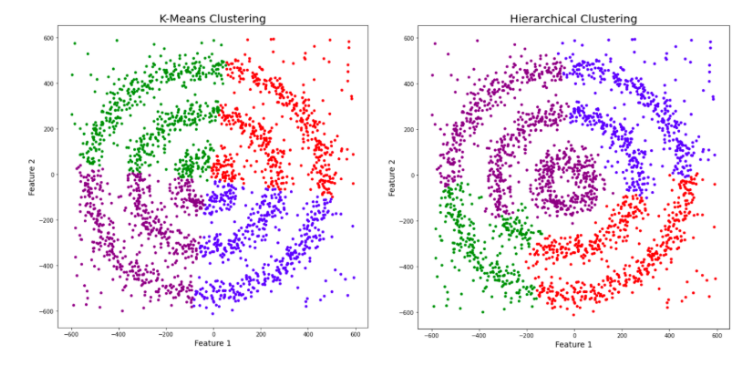

You might be wondering why there are four colors in the graph? As I said earlier, this data contains noise too, therefore, I have taken noise as a different cluster which is represented by the purple color. Sadly, both of them failed to cluster the data points. Also, they were not able to properly detect the noise present in the dataset. Now, let’s take a look at the results from DBSCAN clustering.

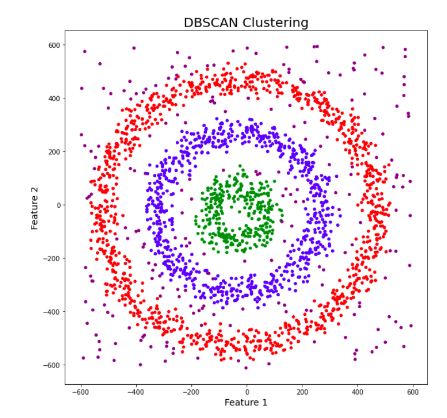

DBSCAN is not just able to cluster the data points correctly, but it also perfectly detects noise in the dataset.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

Let’s understand it with the help of an example.

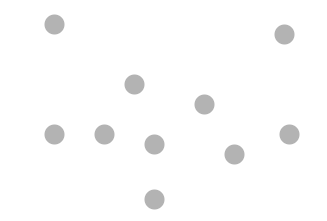


Here, we have some data points represented by grey color. Let’s see how DBSCAN clusters these data points.


#### DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. 
A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

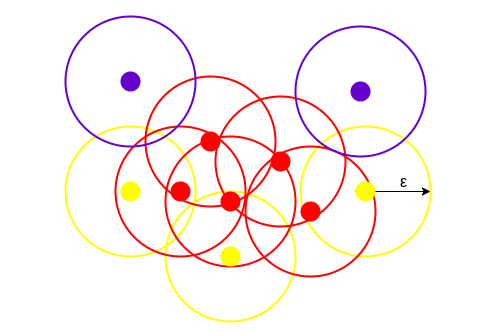

In [38]:
dbs = DBSCAN(eps=2, min_samples=10)
dbs.fit_predict(scaled)
score = silhouette_score(scaled, dbs.labels_, random_state=0)
print(f"Silhouette score: {score:0.3f}")

Silhouette score: 0.179


# K-means from scratch

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

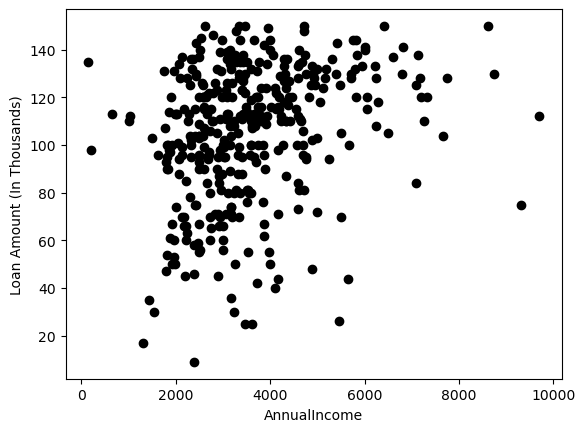

In [4]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

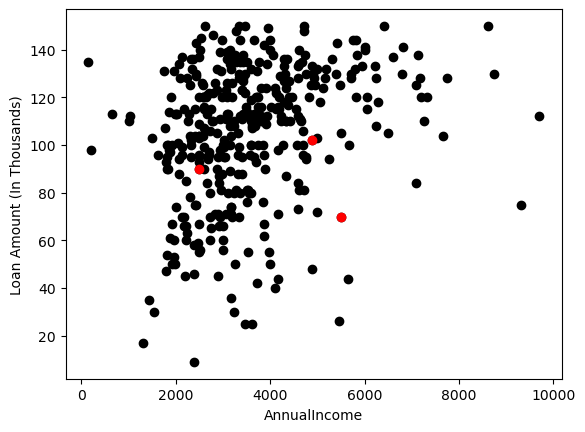

In [8]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [6]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

294.98852727378676
216.30028144385471
169.46106058187374


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

198.9136595178422
52.84741626127729


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

98.54724443834282
90.64953219227577
18.274686272279013


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

9.21023994083339
18.345487493007468


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

46.27013250786139
0.0


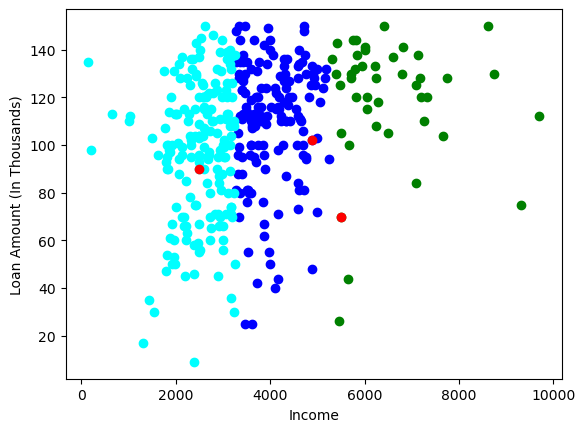

In [9]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()